In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import imread, showMatches
from detectBlobs import detectBlobs
from drawBlobs import drawBlobs
from skimage.color import rgb2gray
from scipy.ndimage.filters import convolve
from compute_sift import compute_sift
from computeMatches import computeMatches
from mergeImages import mergeImages
from ransac import ransac

import sys
%matplotlib inline

/home/ec2-user/anaconda3/envs/python2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
from scipy.spatial.distance import cdist
from skimage.feature import plot_matches
def computeMatches11(f1, f2):
    """ Match two sets of SIFT features f1 and f2 """
    reject_limit = .7
    matches = []
    distance_matrix = cdist(f1, f2)
    smallest_matrix = f1
    if (f2.shape[0] < f1.shape[0]):
        smallest_matrix = f2
    for n in range(smallest_matrix.shape[0]):
        currd_matrix = distance_matrix[n]
        if (np.min(currd_matrix) / np.partition(currd_matrix, 2)[1]) < reject_limit:
            matches.append([n])
    matches = np.squeeze(np.array(matches))
    return matches

def showMatches11(im1, im2, c1, c2, matches, type, fileName):
    title, save_location = '', '../output/random/default.jpg'
    if type == 'general':
        title = 'Match between features for {}'.format(fileName)
        save_location = '../output/matches/general_{}.jpg'.format(fileName)
    elif type == 'inliers':
        title = 'Inliers obtained from RANSAC for {}'.format(fileName)
        save_location = '../output/matches/inliers_{}.jpg'.format(fileName)
    
    disp_matches = np.array([np.arange(matches.shape[0]), matches]).T.astype(int)
    valid_matches = np.where(matches>=0)[0]
    disp_matches = disp_matches[valid_matches, :]
    fig, ax = plt.subplots(nrows=1, ncols=1)
    #from IPython import embed; embed(); exit(-1)
    plot_matches(ax, im1, im2, 
            c1[:, [1,0]].astype(int), c2[:,[1,0]].astype(int), disp_matches)
    ax.set_title(title)
    plt.savefig(save_location)
    
    plt.show()

Convolving for level = 0
Convolving for level = 1
Convolving for level = 2
Convolving for level = 3
Convolving for level = 4
Convolving for level = 5
Convolving for level = 6
Convolving for level = 7
Convolving for level = 8
Convolving for level = 9
Convolving for level = 10
Convolving for level = 11
Convolving for level = 12
Iterating for Level=0
Iterating for Level=1
Iterating for Level=2
Iterating for Level=3
Iterating for Level=4
Iterating for Level=5
Iterating for Level=6
Iterating for Level=7
Iterating for Level=8
Iterating for Level=9
Iterating for Level=10
Iterating for Level=11
Iterating for Level=12
Convolving for level = 0
Convolving for level = 1
Convolving for level = 2
Convolving for level = 3
Convolving for level = 4
Convolving for level = 5
Convolving for level = 6
Convolving for level = 7
Convolving for level = 8
Convolving for level = 9
Convolving for level = 10
Convolving for level = 11
Convolving for level = 12
Iterating for Level=0
Iterating for Level=1
Iterating f

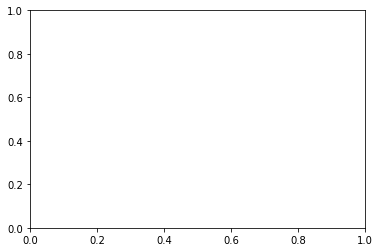

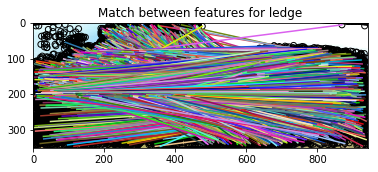

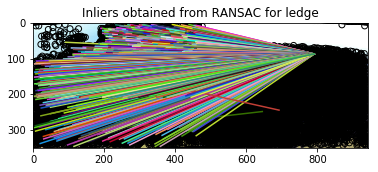

Convolving for level = 0
Convolving for level = 1
Convolving for level = 2
Convolving for level = 3
Convolving for level = 4
Convolving for level = 5
Convolving for level = 6
Convolving for level = 7
Convolving for level = 8
Convolving for level = 9
Convolving for level = 10
Convolving for level = 11
Convolving for level = 12
Iterating for Level=0
Iterating for Level=1
Iterating for Level=2
Iterating for Level=3
Iterating for Level=4
Iterating for Level=5
Iterating for Level=6
Iterating for Level=7
Iterating for Level=8
Iterating for Level=9
Iterating for Level=10
Iterating for Level=11
Iterating for Level=12
Convolving for level = 0
Convolving for level = 1
Convolving for level = 2
Convolving for level = 3
Convolving for level = 4
Convolving for level = 5
Convolving for level = 6
Convolving for level = 7
Convolving for level = 8
Convolving for level = 9
Convolving for level = 10
Convolving for level = 11
Convolving for level = 12
Iterating for Level=0
Iterating for Level=1
Iterating f

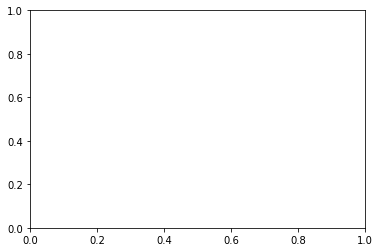

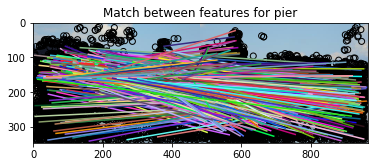

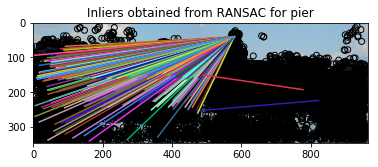

Convolving for level = 0
Convolving for level = 1
Convolving for level = 2
Convolving for level = 3
Convolving for level = 4
Convolving for level = 5
Convolving for level = 6
Convolving for level = 7
Convolving for level = 8
Convolving for level = 9
Convolving for level = 10
Convolving for level = 11
Convolving for level = 12
Iterating for Level=0
Iterating for Level=1
Iterating for Level=2
Iterating for Level=3
Iterating for Level=4
Iterating for Level=5
Iterating for Level=6
Iterating for Level=7
Iterating for Level=8
Iterating for Level=9
Iterating for Level=10
Iterating for Level=11
Iterating for Level=12
Convolving for level = 0
Convolving for level = 1
Convolving for level = 2
Convolving for level = 3
Convolving for level = 4
Convolving for level = 5
Convolving for level = 6
Convolving for level = 7
Convolving for level = 8
Convolving for level = 9
Convolving for level = 10
Convolving for level = 11
Convolving for level = 12
Iterating for Level=0
Iterating for Level=1
Iterating f

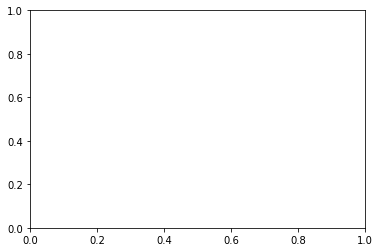

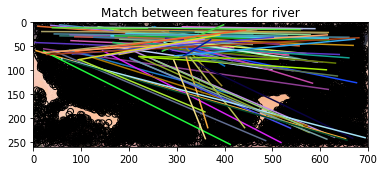

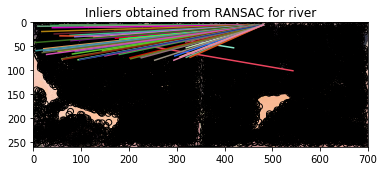

Convolving for level = 0
Convolving for level = 1
Convolving for level = 2
Convolving for level = 3
Convolving for level = 4
Convolving for level = 5
Convolving for level = 6
Convolving for level = 7
Convolving for level = 8
Convolving for level = 9
Convolving for level = 10
Convolving for level = 11
Convolving for level = 12
Iterating for Level=0
Iterating for Level=1
Iterating for Level=2
Iterating for Level=3
Iterating for Level=4
Iterating for Level=5
Iterating for Level=6
Iterating for Level=7
Iterating for Level=8
Iterating for Level=9
Iterating for Level=10
Iterating for Level=11
Iterating for Level=12
Convolving for level = 0
Convolving for level = 1
Convolving for level = 2
Convolving for level = 3
Convolving for level = 4
Convolving for level = 5
Convolving for level = 6
Convolving for level = 7
Convolving for level = 8
Convolving for level = 9
Convolving for level = 10
Convolving for level = 11
Convolving for level = 12
Iterating for Level=0
Iterating for Level=1
Iterating f

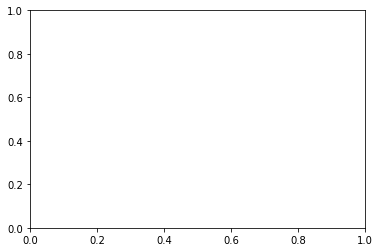

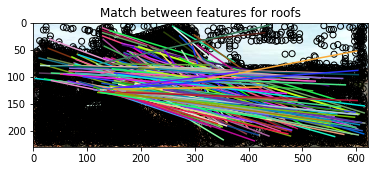

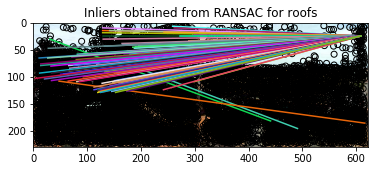

Convolving for level = 0
Convolving for level = 1
Convolving for level = 2
Convolving for level = 3
Convolving for level = 4
Convolving for level = 5
Convolving for level = 6
Convolving for level = 7
Convolving for level = 8
Convolving for level = 9
Convolving for level = 10
Convolving for level = 11
Convolving for level = 12
Iterating for Level=0
Iterating for Level=1
Iterating for Level=2
Iterating for Level=3
Iterating for Level=4
Iterating for Level=5
Iterating for Level=6
Iterating for Level=7
Iterating for Level=8
Iterating for Level=9
Iterating for Level=10
Iterating for Level=11
Iterating for Level=12
Convolving for level = 0
Convolving for level = 1
Convolving for level = 2
Convolving for level = 3
Convolving for level = 4
Convolving for level = 5
Convolving for level = 6
Convolving for level = 7
Convolving for level = 8
Convolving for level = 9
Convolving for level = 10
Convolving for level = 11
Convolving for level = 12
Iterating for Level=0
Iterating for Level=1
Iterating f

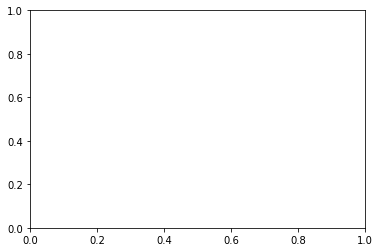

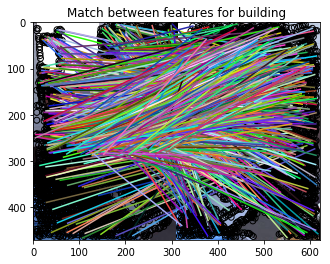

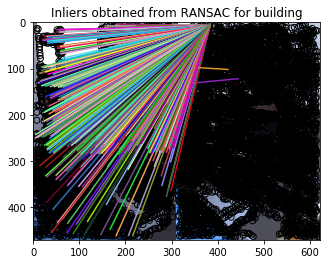

Convolving for level = 0
Convolving for level = 1
Convolving for level = 2
Convolving for level = 3
Convolving for level = 4
Convolving for level = 5
Convolving for level = 6
Convolving for level = 7
Convolving for level = 8
Convolving for level = 9
Convolving for level = 10
Convolving for level = 11
Convolving for level = 12
Iterating for Level=0
Iterating for Level=1
Iterating for Level=2
Iterating for Level=3
Iterating for Level=4
Iterating for Level=5
Iterating for Level=6
Iterating for Level=7
Iterating for Level=8
Iterating for Level=9
Iterating for Level=10
Iterating for Level=11
Iterating for Level=12
Convolving for level = 0
Convolving for level = 1
Convolving for level = 2
Convolving for level = 3
Convolving for level = 4
Convolving for level = 5
Convolving for level = 6
Convolving for level = 7
Convolving for level = 8
Convolving for level = 9
Convolving for level = 10
Convolving for level = 11
Convolving for level = 12
Iterating for Level=0
Iterating for Level=1
Iterating f

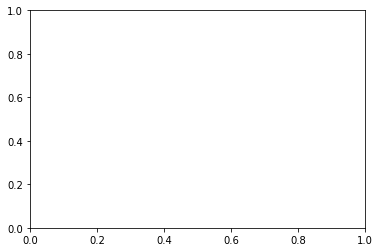

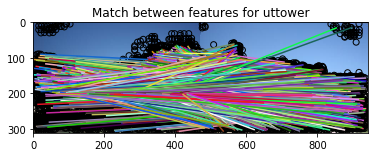

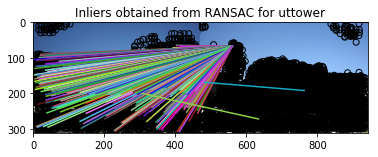

In [4]:
dataDir = os.path.join('..', 'data', 'stitching')
cutoff = 0.002
testExamples = ['ledge', 'pier', 'river', 'roofs', 'building', 'uttower'] #,  #'hill', 'field'
for example in testExamples:
    plt.clf()
    plt.cla()
    imageName1 = '{}1_r.jpg'.format(example)
    imageName2 = '{}2_r.jpg'.format(example)
    im1 = imread(os.path.join(dataDir, imageName1))
    im2 = imread(os.path.join(dataDir, imageName2))
    
    #Detect keypoints
    blobs1 = detectBlobs(im1, {'cutoff': cutoff, 'level': 13})
    blobs2 = detectBlobs(im2, {'cutoff': cutoff, 'level': 13})

    #Compute SIFT features
    sift1 = compute_sift(im1, blobs1)
    sift2 = compute_sift(im2, blobs2)

    #Find the matching between features
    matches = computeMatches11(sift1, sift2)
    showMatches11(im1, im2, blobs1, blobs2, matches, 'general', example) # Custom Show Matches
    
    inliers, transf = ransac(matches, blobs1, blobs2)
    goodMatches = np.zeros_like(matches)
    goodMatches[inliers] = matches[inliers]
    showMatches11(im1, im2, blobs1, blobs2, goodMatches, 'inliers', example) # Custom Show Matches